# Chapter 2.2 SIFT - Scale Invariant Feature Transform

Here I will run the command-line utility sift on empire.jpg 
to show the effects of the sift descriptor 

processed tmp.pgm to empire.sift


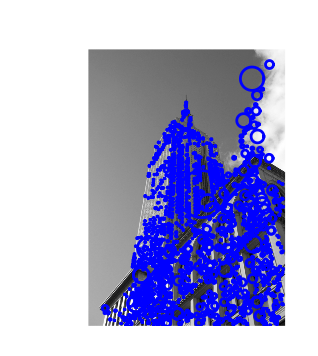

In [1]:
import sift
from PIL import Image
from numpy import *
from pylab import *
%matplotlib inline

imname = 'empire.jpg'
im1 = array(Image.open(imname).convert('L'))
# First, run the SIFT descriptor using the command line utility sift.
# Can use the python wrapper in sift.py to do this 
sift.process_image(imname,'empire.sift')
# now read the features from the sifted image
l1,d1 = sift.read_features_from_file('empire.sift')
figure()
gray()
sift.plot_features(im1,l1,circle=True)
show()

The centers of the circles mark the locations of the features that were identified by the SIFT transform. The size of the circles corresponds to the scale of the features. This is a parameter that the harris transform does not have. Can compare the results to the harris transform visually:

(-100.0, 600.0, 800.0, -100.0)

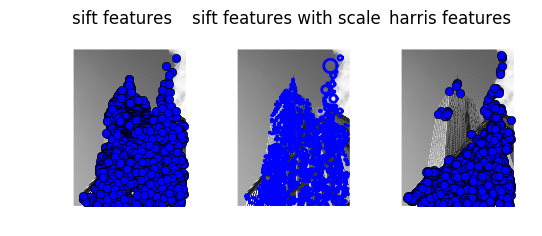

In [2]:
import harris
from pylab import *

figure()
gray()
subplot(1,3,1)
sift.plot_features(im1,l1,circle=False)
title('sift features')
subplot(1,3,2)
sift.plot_features(im1,l1,circle=True)
title('sift features with scale')
subplot(1,3,3)
harrisim = harris.compute_harris_response(im1)
filtered_coords = harris.get_harris_points(harrisim,min_dist=6,
                                           threshold=0.05) 
imshow(im1)
plot([p[1] for p in filtered_coords],[p[0] for p in filtered_coords],'o')
title('harris features')
axis('off')

Now we can find matching features in two images in a similar way
to how it was done for the harris features:
[Harris corner detection](Harris corner detection.ipynb) jupyter notebook. The matching criteria are somewhat more sophisticated than for Harris, which help reduce false matches


In [3]:
# Let's use small images so the matching takes place quicker
# The images used in the book are:
filename1 = 'data/crans_1_small.jpg'
filename2 = 'data/crans_2_small.jpg'
# Need to run sift on them
sift_filename1 = filename1.replace('.jpg','.sift')
sift_filename2 = filename2.replace('.jpg','.sift')
sift.process_image(filename1,sift_filename1)
sift.process_image(filename2,sift_filename2)

processed tmp.pgm to data/crans_1_small.sift
processed tmp.pgm to data/crans_2_small.sift


(-200.0, 1000.0, 800.0, -100.0)

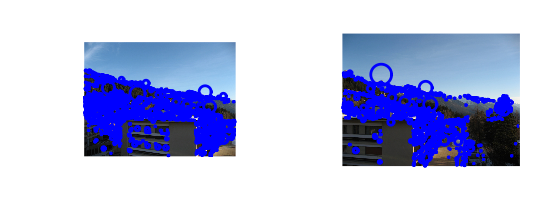

In [5]:
# First show the features in each image side by side
im1 = array(Image.open(filename1))
im2 = array(Image.open(filename2))

l1,d1 = sift.read_features_from_file(sift_filename1)
l2,d2 = sift.read_features_from_file(sift_filename2)
Figure()
subplot(1,2,1)
sift.plot_features(im1,l1,circle=True)
axis('off')
subplot(1,2,2)
sift.plot_features(im2,l2,circle=True)
axis('off')


In [6]:
# Now find the matches between the two images
sift_matches = sift.match_twosided(d1,d2)

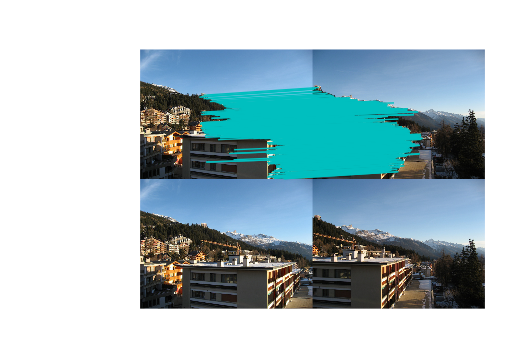

In [7]:
sift.plot_matches(im1,im2,l1,l2,sift_matches,show_below=True) 
# There was a bug in this function, which I had to manually fix in sift.py
# See the Github issue here: https://github.com/jesolem/PCV/issues/28
